# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as sc

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
    
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")

            # Append the City information into city_data list
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Pressure": city_pressure,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"YO! The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | minbu
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | santyoku
Processing Record 8 of Set 1 | shar
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | brookings
Processing Record 14 of Set 1 | remire-montjoly
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | puerto princesa
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | puerto lempira
Processing Reco

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Pressure      572
Country       572
Date          572
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Adamstown,-25.0660,-130.1015,73.58,80,100,21.39,1019,PN,1733951261
1,Minbu,20.1833,94.8833,64.58,76,11,4.09,1010,MM,1733951262
2,Mar del Plata,-38.0023,-57.5575,69.94,83,98,4.00,1011,AR,1733951210
3,Edinburgh of the Seven Seas,-37.0676,-12.3116,57.76,72,99,13.35,1024,SH,1733951264
4,Bethel,41.3712,-73.4140,60.04,90,100,7.00,995,US,1733950988


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/citiesEhlke.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/citiesEhlke.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Adamstown,-25.0660,-130.1015,73.58,80,100,21.39,1019,PN,1733951261
1,Minbu,20.1833,94.8833,64.58,76,11,4.09,1010,MM,1733951262
2,Mar del Plata,-38.0023,-57.5575,69.94,83,98,4.00,1011,AR,1733951210
3,Edinburgh of the Seven Seas,-37.0676,-12.3116,57.76,72,99,13.35,1024,SH,1733951264
4,Bethel,41.3712,-73.4140,60.04,90,100,7.00,995,US,1733950988


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

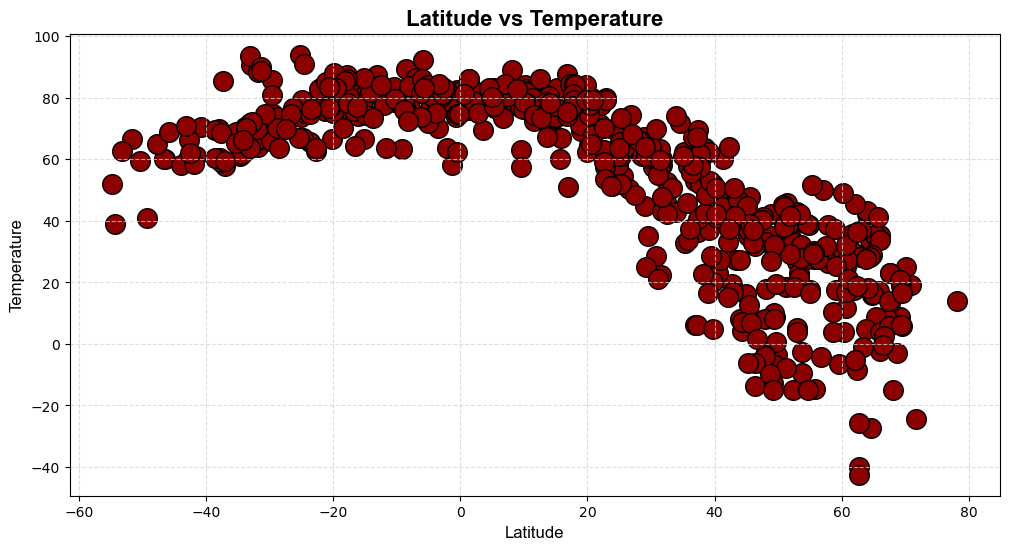

In [34]:
# Build scatter plot for latitude vs. temperature
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="darkred", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

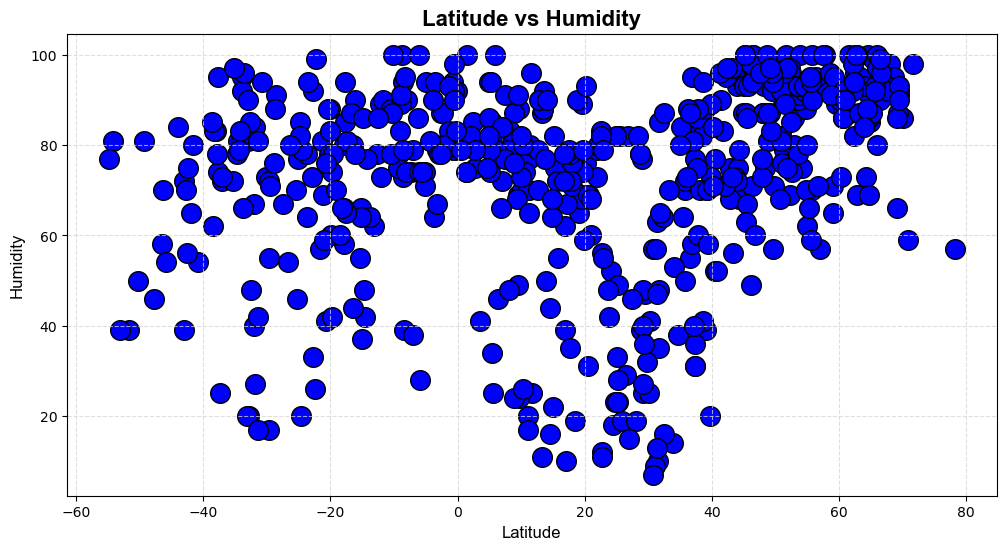

In [36]:
# Build the scatter plots for latitude vs. humidity
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Humidity, color="blue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

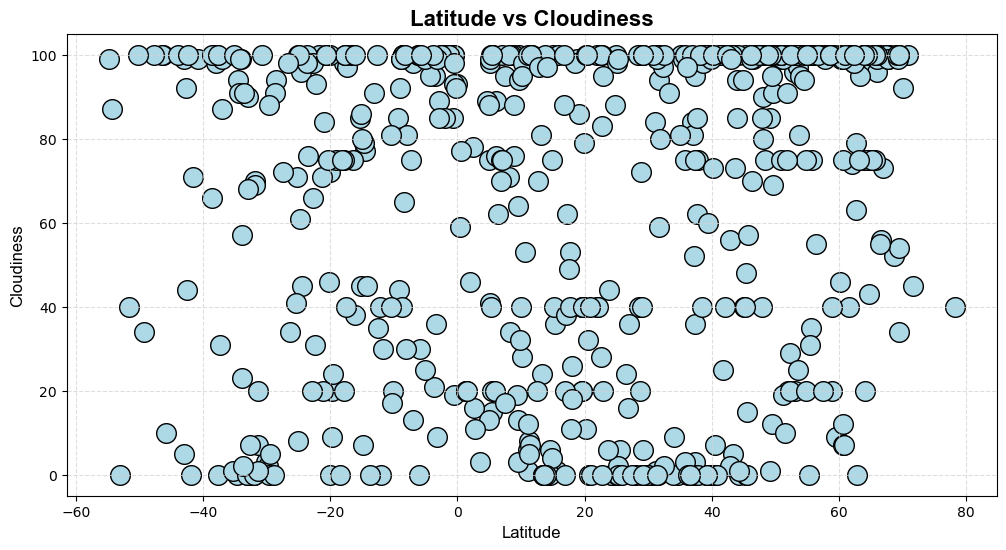

In [38]:
# Build the scatter plots for latitude vs. cloudiness
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, color="lightblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")


# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

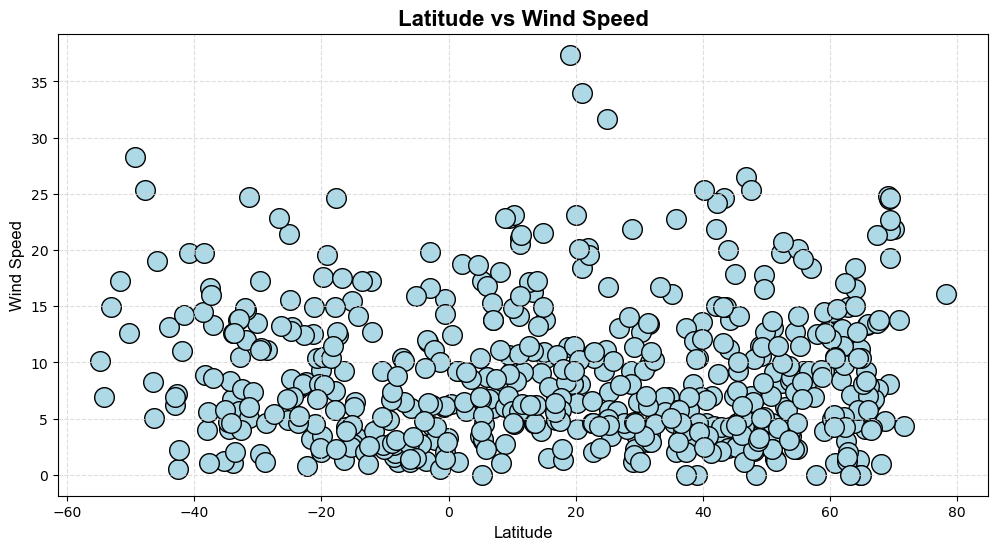

In [42]:
# Build the scatter plots for latitude vs. wind speed
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="lightblue", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
# Add the linear regression equation and line to plot
def do_regression_plot(x_values, y_values, x_label, y_label, annotation):
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = sc.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue**2)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="darkred", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line
    
    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, (5, 35), fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Minbu,20.1833,94.8833,64.58,76,11,4.09,1010,MM,1733951262
1,Bethel,41.3712,-73.4140,60.04,90,100,7.00,995,US,1733950988
2,Albany,42.6001,-73.9662,47.41,96,100,3.00,995,US,1733951109
3,Samcheok,37.4406,129.1708,36.46,82,36,5.12,1022,KR,1733951268
4,Shar,49.5886,81.0453,8.87,82,100,17.76,1041,KZ,1733951269


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Adamstown,-25.0660,-130.1015,73.58,80,100,21.39,1019,PN,1733951261
1,Mar del Plata,-38.0023,-57.5575,69.94,83,98,4.00,1011,AR,1733951210
2,Edinburgh of the Seven Seas,-37.0676,-12.3116,57.76,72,99,13.35,1024,SH,1733951264
3,Port-aux-Français,-49.3500,70.2167,40.77,81,34,28.27,982,TF,1733951209
4,Invercargill,-46.4000,168.3500,60.03,70,100,5.01,997,NZ,1733951258


###  Temperature vs. Latitude Linear Regression Plot

0.6964934606835192
y = -1.22x + 90.01


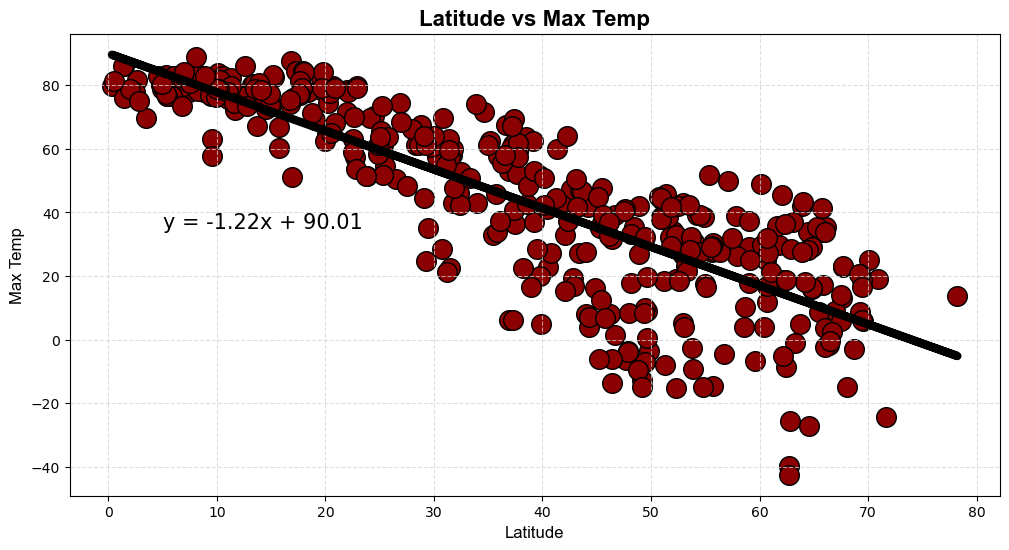

In [73]:
# Linear regression on Northern Hemisphere
annotation=(10, 0)
do_regression_plot(northern_hemi_df.Lat, northern_hemi_df["Max Temp"], "Latitude", "Max Temp", annotation)

0.31443109029575866
y = 0.38x + 82.49


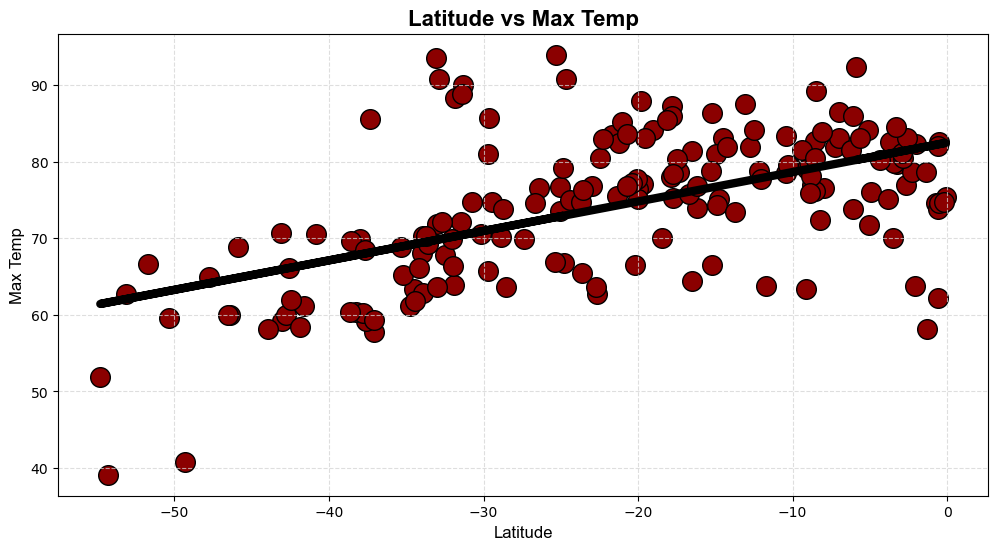

In [87]:
# Linear regression on Southern Hemisphere
annotation=(20, 50)
do_regression_plot(southern_hemi_df.Lat, southern_hemi_df["Max Temp"], "Latitude", "Max Temp", annotation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

0.16271290611339256
y = 0.46x + 56.07


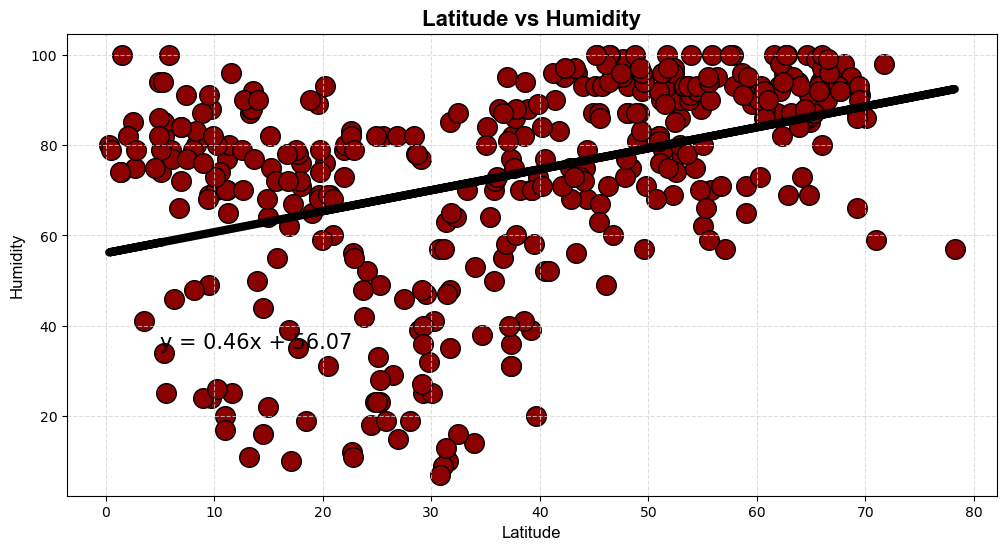

In [85]:
# Northern Hemisphere
annotation=(0, 40)
do_regression_plot(northern_hemi_df.Lat, northern_hemi_df.Humidity, "Latitude", "Humidity", annotation)

0.07880942362553119
y = 0.38x + 80.49


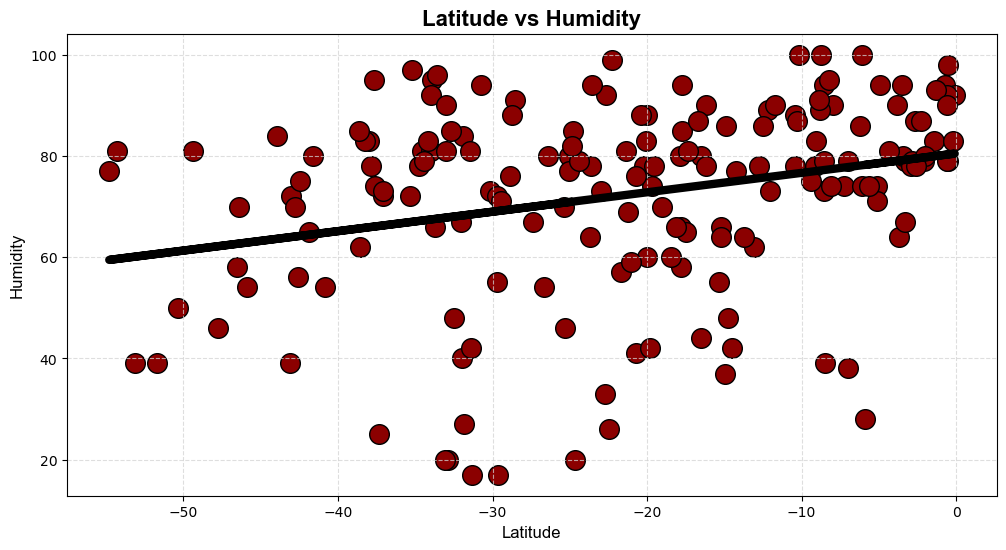

In [91]:
# Southern Hemisphere
annotation=(0, 40)
do_regression_plot(southern_hemi_df.Lat, southern_hemi_df.Humidity, "Latitude", "Humidity", annotation)

**Discussion about the linear relationship:** It gets hotter the closer you are to the equator. In the southern hemisphere it becomes more humid the closer you are to the equator, but the northen hemisphere is the opposite.

### Cloudiness vs. Latitude Linear Regression Plot

0.0882205988244739
y = 0.58x + 41.0


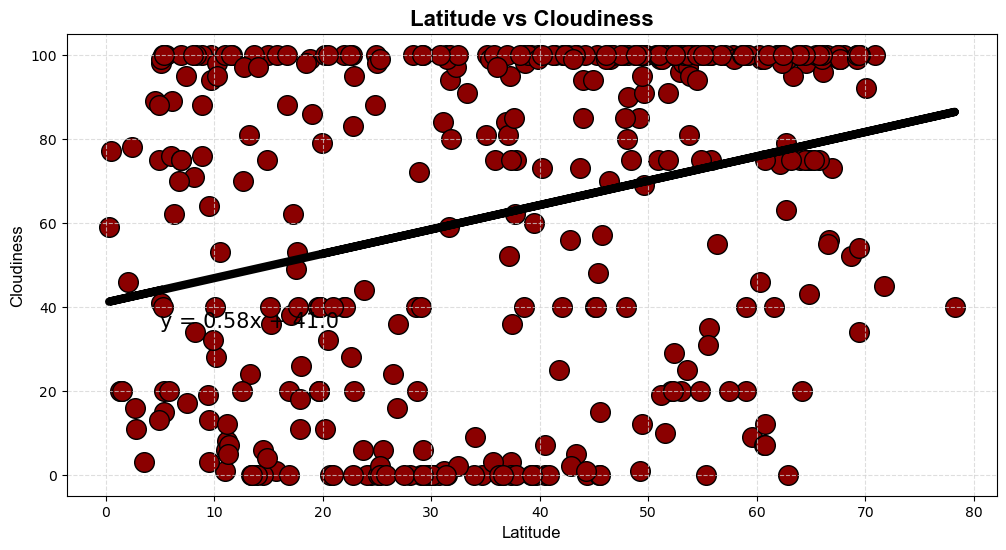

In [93]:
# Northern Hemisphere
annotation=(0, 40)
do_regression_plot(northern_hemi_df.Lat, northern_hemi_df.Cloudiness, "Latitude", "Cloudiness", annotation)

0.021055569002836144
y = 0.39x + 72.72


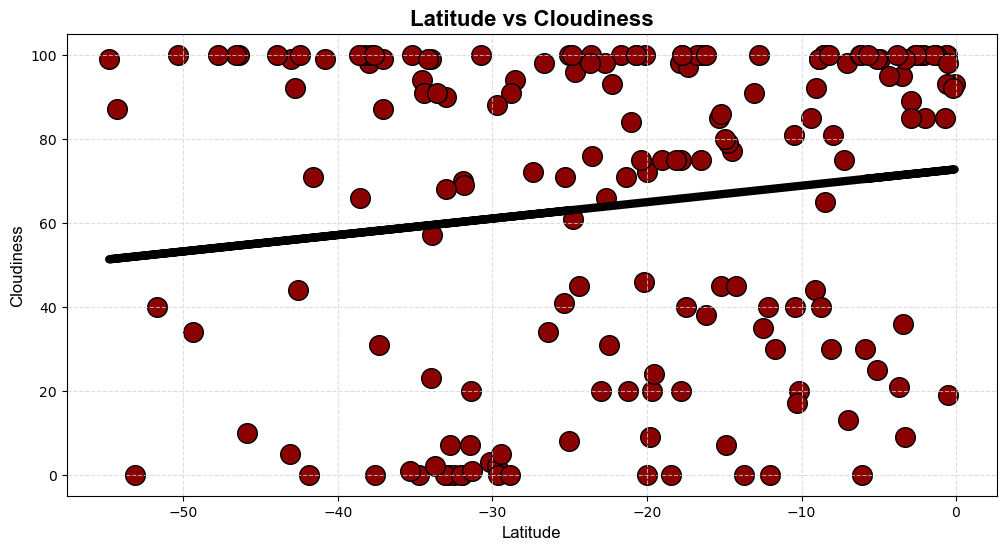

In [101]:
# Southern Hemisphere
annotation=(-50, 0)
do_regression_plot(southern_hemi_df.Lat, southern_hemi_df.Cloudiness, "Latitude", "Cloudiness", annotation)

**Discussion about the linear relationship:** In the Northern Hemisphere, it is generally cloudier the more north you go, same for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

0.00035130345133997074
y = -0.01x + 9.2


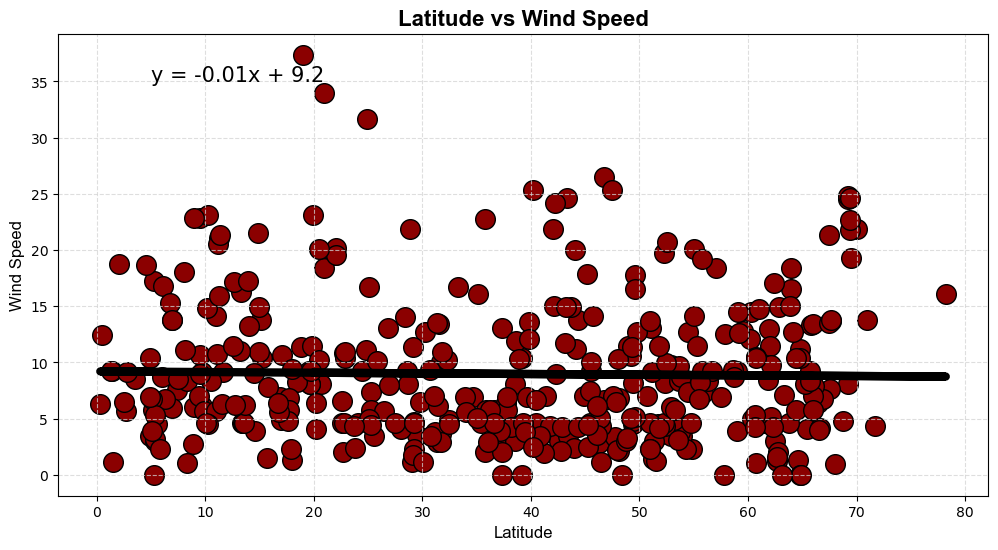

In [97]:
# Northern Hemisphere
annotation=(0, 40)
do_regression_plot(northern_hemi_df.Lat, northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", annotation)

0.0863751557099223
y = -0.12x + 5.78


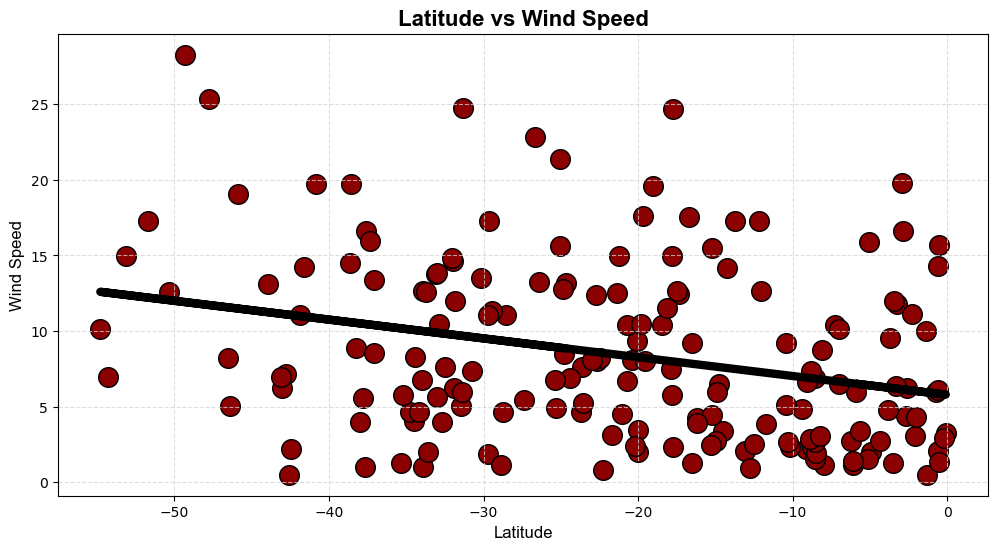

In [103]:
# Southern Hemisphere
annotation=(-50, 10)
do_regression_plot(southern_hemi_df.Lat, southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", annotation)

**Discussion about the linear relationship:** There is no correlation between wind speed and latitude in the northern hemisphere, while it can be said that it is less windy the more north you are in the southern hemisphere.